<img src="./img/HWNI_logo.svg"/>

# Lab A - Review of Probability and Python Fundamentals

We'll begin by going over both key notions from probability and some of the most fundamental descriptive statistics -- means, medians, and so on. We'll also take this opportunity to practice using the technological tools we'll need for this course.

In this first (shorter) half of the lab, we'll be reviewing probability and using some of the fundamental tools of Python: lists, dictionaries, and functions.

If you've never done any computer programming before, make sure to work through the [Codecademy Python course](https://www.codecademy.com/learn/python) through Lesson 9 as soon as possible. You won't necessarily need it to make it through this lab, but baseline comfort with programming is a key skill for this course and for most of science today.

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

# seaborn - easy plotting for statistical visualizations
#   based off of matplotlib
import seaborn as sns

import util.utils as utils
import util.shared as shared

shared.format_plots()

## What is Probability?

The meaning of a statement like "the chance that I roll a die and it comes up 6 is 1/6" is both intuitively obvious and flabbergastingly difficult to pin down. Indeed, the foundations of probability are a topic for [philosophy](https://plato.stanford.edu/entries/probability-interpret/) as much as or more than for mathematics. Four alternative interpretations of that statement appear below: 

- If I were to prepare a large number of dice identical to this one and roll them all at once, about 1/6 of them would come up 6
- If I were to examine all possible universes consistent with my beliefs right now, then 1/6 of them contain me rolling a die that comes up as a 6
- If I wish to think logically about the statement "the die comes up a 6", then, given my current knowledge, I should assign the truth value 1/6 (where 1 is definitely true and 0 is definitely false)
- The mathematical rules that I need to apply to games involving rolling dice in order to avoid being cheated tell me to assign the number 1/6 to the event "the die comes up a 6"

Which of these interpretations you prefer is, in the end, an aesthetic choice. The lattermost view, due to [de Finetti](https://en.wikipedia.org/wiki/Bruno_de_Finetti), is known as the ["Dutch Book"](https://en.wikipedia.org/wiki/Dutch_book) argument and is popular among financial mathematicians and stock traders. The formermost view, the [*frequentist* view](https://en.wikipedia.org/wiki/Frequentist_probability), is most popular among practicing scientists and is the "traditional" view among statisticians. The second and third views are two flavors of [*Bayesianism*](http://charlesfrye.github.io/stats/2016/02/04/bayes-rule.html), and are popular among cognitive and computer scientists and the current generation of statisticians. The third is forcefully argued for by [Edwin Jaynes](https://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes) in his posthumous work *Probability Theory: The Logic of Science*.

We won't dwell on these questions here, but it's worth considering what your opinion is and why you hold it.

## What are Probability Distributions?

Regardless of what it "really means", once we have a mathematical definition of probability, we can start manipulating that mathematical model to understand it better. Armed with a few common sense ideas -- the probability that "something happens" is always 1, nothing can have a negative probability, and the probability of either of two things happening is at least as much as one of them happening -- we can define two important notions: the *probability mass function* and the *probability density function*. These are both examples of *probability distributions*.

### Probability Mass Functions

If I roll a die, only one of 6 things might happen -- I'll get a number from 1 to 6. One die might be well-made and fair, and so each number will have the same chance of showing up. Another die might be poorly-made, and so there will be some small variations in those chances. Another die might be intentionally made unfair, and so there will be some big variations.

We'd like to be able to describe the differences between these dice with numbers. We do this by defining, for each die, a function that takes in a number between 1 and 6 and spits out the probability that rolling the die will result in that number. We call this the *probability mass function*.

Why *mass function*? Remember two of our common sense ideas about probability: nothing can have a negative probability, and the probability of either of two things happening is at least as much as one of them happening. These are the same restrictions that we have when we're talking about the masses of objects: nothing can have a negative mass, and the mass of two things is at least as much as the mass of one of the objects (why is the mass of two objects not the sum of the masses of the individual objects? What happens if our two objects are "my arm" and "my whole body"?).

The closest physical analogue to the probability mass function for a (possibly loaded) die is the mass function for a box of six rocks. For each rock, the mass function tells me how much mass it has, a number which cannot be negative. If I add up the masses of all of the rocks, I get the total mass of the collection of rocks. A fair die, one on which all faces have the same chance of landing up, like the ones we normally use for games of chance, would be like a box with six rocks that all weigh the same.

Mathematically, then, probabilities are like masses. We put a lot of "mass" on events that are likely to occur and less "mass" on events that are unlikely. One big difference between probability and physical mass is that the "total mass" for a probability mass function is always one.

### Probability Mass Functions in Python

Here are two good ways to represent probability mass functions in Python: as *lists* and as *dictionaries*. Lists are good when the probability mass functions take in numbers, as in our dice-rolling example, while dictionaries are good when the probability mass functions take in something else, like the suit and rank of a playing card. We could also use *functions*, which are discussed more below.

#### Probability Mass Functions with Lists

A list is an ordered collection of objects -- everything in Python is an object, so a list can contain numbers, strings, even functions or other lists! Because lists are ordered, we can retrieve items from a list using a number -- the *index*, or how far into the list the item is. Note that the "first" item in a list is, in Python, at index `0`.

To represent a probability mass function, we want a *list of numbers*. Below, I've written out the probability mass function for a fair die. Underneath it, please write the probability mass function (PMF for short) for an unfair die of your choosing. The code in the cell after next will plot both mass functions, so you can see what they look like.

In [2]:
# list = [item0,item1,item2, ... ]

fair_PMF = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0]

unfair_PMF = [0, 1/2, 1/4, 1/8, 1/16, 1/32, 1/32, 0]

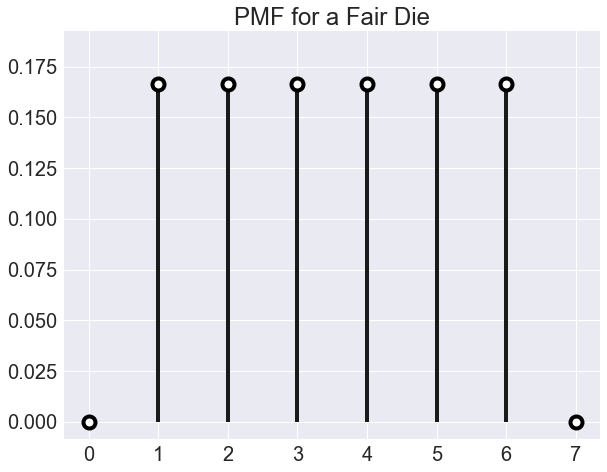

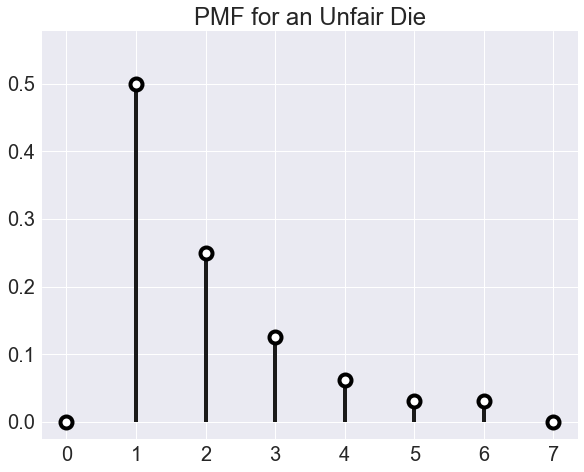

In [3]:
utils.plot_PMF(fair_PMF, title='PMF for a Fair Die');
utils.plot_PMF(unfair_PMF, title='PMF for an Unfair Die');

#### Q1 Why is the first element of the list 0?

<font color='#1874CD'> ** The index for the first element of a Python list is `0`. The chance of a die coming up 0 is 0! **

#### Q2 In the code cell below, calculate the chance of each of the following events for the fair and unfair die.

a. 6
  
b. Greater than 3
  
c. Either odd or less than 3

In [4]:
fair_A = fair_PMF[6]
fair_B = sum(fair_PMF[4:])
fair_C = sum(fair_PMF[1::2])+fair_PMF[2]

unfair_A = unfair_PMF[6]
unfair_B = sum(unfair_PMF[4:])
unfair_C = sum(unfair_PMF[1::2])+unfair_PMF[2]

#### Probability Mass Functions with Dictionaries

Now, we ran into a bit of awkwardness up there when we defined our probability mass function because Python list indices start at 0 but dice start at 1. If dice started at 100, we would've been in real trouble! And if we'd been working with playing cards instead of dice, we wouldn't have had any way to proceed.

One way out would be to declare that `fairPMF[0]` is the probability that 1 comes up, rather than 0, and so on up until `fairPMF[5]`, the probability that 6 comes up. This is a perfectly acceptable solution, but it requires you to remember that `1` the index is not 1, the number on the die. That's OK in this case, but when you try and extend it to something more complicated, like the deck of cards, the relationship between index and outcome can get hairy.

We can avoid this using *dictionaries*, which are like lists that use names as indices, instead of numbers. These names are called *keys*. Like paper dictionaries, when I want to look up an object in a Python dictionary, I use its name. Unlike paper dictionaries, the contents are not sorted, and unlike lists, their order might change.

Below, I've defined two probability mass functions with dictionaries, one for a fair die and the other for the grade distribution of a curved class (not this one!). Define your own to make sure you've got the hang of the syntax.

In [5]:
# dictionary = {key0:item0, key1:item1, ... }

fair_PMF = {1:1/6,
           2:1/6,
           3:1/6,
           4:1/6,
           5:1/6,
           6:1/6,
          }

grades_PMF = {'A':0.25,'B':0.4,'C':0.2,'D':0.05,'F':0.1}

#your_PMF goes here

#### Q3 In the code cell below, calculate the following:

a. the chance a fair die comes up even

b. the chance a randomly-chosen student passes the class (D or higher)

c. the chance of an interesting event based on your PMF.

In [6]:
even_die = sum(fair_PMF[even] for even in range(2,7,2))
pass_class = 1-grades_PMF['F']

your_event = []

### Probability Density Functions

Probability mass functions are useful, but there are some situations where they're not enough. For example, say I throw a dart at a circular dartboard and ask where it landed. There are so many possible places that the dart could land that it's impossible to list them all, even with infinite time (this is called an *uncountable infinity*). We need to be able to list something in order to define a probability mass function, so we need something new to handle these cases.

We introduce the *probability density function* by analogy to the densities we encounter in the physical world. The density function of an object tells you how its mass is distributed -- where there is more mass per unit volume, the density is higher, and where there is less, the density is lower. We can use density functions to calculate how much mass there is in each and every part of an object.

When the density is the same across the whole object, we can just multiply this constant density value by the volume of the part we're interested in to get the mass. For complicated objects, like humans and laptop computers, the density will be very different at different points. If we want to know how approximately much an object weighs, we need to take a whole bunch of small volumes and add up how much mass is in each of them. The smaller the volumes we take, the more accurate our measurement of the mass will be -- the density can't change too much if the volume is small. Using calculus, we can describe mathematically what happens when our volumes are "infinitely small" and so the mass we calculate will be exactly correct. You may be familiar with this idea, which is called an *integral*.

So, just like the density function is the function we integrate in order to get the mass of any part of an object, a probability density function is the function we integrate in order to get the probability of any group of events out of the possible outcomes. Again, we want the chance that "something happens" to be 1, so we say that the integral of a probability density function is 1.

Also just like regular density, the probability density at a given point can be higher than the total probability. For example, the density of human bone is roughly 2000 kg/m$^3$, but humans weigh much less than 2000 kilograms. Similarly, the density of probability in one region might be more than 1, even though the total amount of probability is always exactly 1.

When we want to speak generally about a collection of probabilities but don't want to specify whether it's a probability mass function or a probability density function, we call it a *probability distribution*.

#### Probability Density Functions in Python

Because we cannot list all of the possible outcomes, we cannot use a list or a dictionary to represent a probability density function. Instead, we need to use a Python *function*. Just like a mathematical function, a Python function takes in an input and returns an output. Python functions can be used to represent mass or density functions.

Below, I've defined a Python function that corresponds to a probability density function that is equal to 1 between 0 and 1 and 0 everywhere else. A probability density or mass function that is equal to some constant value for certain numbers and 0 for all others is called a *uniform* density or mass function.

Write your own probability density function below. For simplicity's sake, let's say that only outcomes between 0 and 1 are possible, just like in my `uniform_PDF`. That means `your_PDF` can be any function that integrates to one between 0 and 1. Remember: the integral is equal to the "area under the curve". What are some shapes you know the area of?

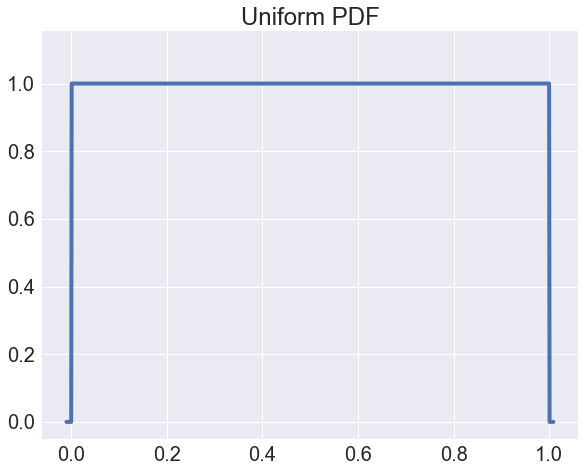

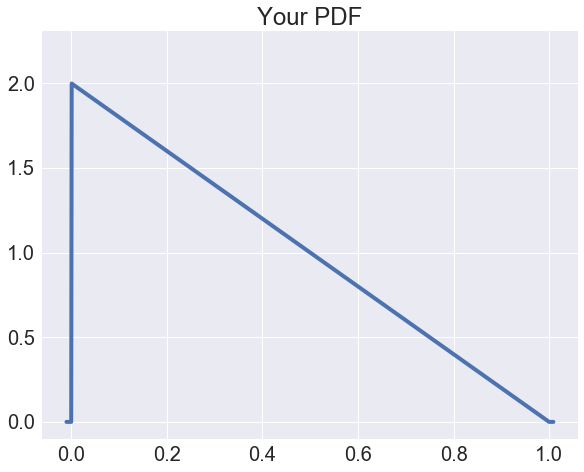

In [7]:
# def function(input0,input1,...):
    # do stuff
    # to inputs
    # make outputs
    # return outputs

def uniform_PDF(x):
    if 0 < x < 1:
        return 1
    else:
        return 0
    
def your_PDF(x):
    if 0 < x < 1:
        return 2*(1-x) #triangle
    else:
        return 0

utils.plot_PDF(uniform_PDF,title='Uniform PDF')

utils.plot_PDF(your_PDF,title='Your PDF')

assert utils.integrates_to_one(your_PDF)

#### Q4 What was the maximum value of your probability density function? Was it greater than 1? What about for your probability mass function? Why is an output bigger than 1 possible in one case but not the other?

<font color='#1874CD'> **The maximum value for this "triangular distribution" was 2, which is greater than 1. The maximum for the "triangular" probability mass function was $\frac{1}{2}$.**

**This isn't a coincidence! The probability mass function of `x` gives the actual probability of the event `x`, while probability density functions need to be integrated over a range to give the probability of `x` being in that range.**

### Cumulative Density Functions

Instead of asking "what's the probability density at x?", it's sometimes more natural to ask "what's the probability that the value is less than or equal to x?". For every x, the result is a value that is between 0 and 1 (why?). Since we can put in any x and get out a single answer, we have defined a function! The function that takes in a number and tells you the probability that a random value is less than or equal to that number is called the *cumulative distribution function*, since it tracks how much probability has "accumulated" up to a given number. 

## From Probability to Statistics

Probability comprises a set of mathematical tools and concepts that we can use to model and understand events that occur "randomly". In science, the events of interest are observations of physical systems, usually organized into experiments. We collect these observations, also called *data*, into datasets, and then we wish to understand those datasets. *Statistics* is the applied mathematical discipline of understanding datasets using probability.

In the next (longer) half of the lab, we'll cover some fundamental ideas of statistics and implement them with the Python libraries pandas, numpy, and seaborn.